Goals for this file:

- Take a DI water data set and find its best fit coefficients. 
- Find the uncertainty in these coefficients. 
- Access all data files sequentially
    -- Find their best fit lines, as well as the number of counts found for wavelengths shorter than 275 nm
    -- Scale the best fit of each data set according to the ratio of the aforementioned number and the number found
     for the DI water
    -- Subtract the best fit from each data set
    -- Find the total number of counts for each data set
    -- Graph the results

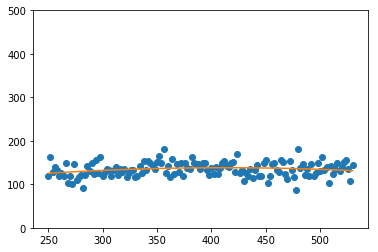

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import glob

DI_pathname = '/home/leonidus/WBLS_Data/DI/DI_2NM_1.arc_data'

def light_machine(path):
    with open(DI_pathname) as calib:
        for _ in range(100):
            next(calib)
        wavelength = []
        counts = []
        for line in calib:
            temp = line.split()
            wavelength.append(float(temp[0]))
            counts.append(float(temp[1]))
            
    return np.array(wavelength), np.array(counts)

def initial_counts(wavelength, counts):
    return np.trapz(wavelength[:11], counts[:11])

def best_fit_modifier(wavelength, counts, c_wavelength, c_counts):
    new_fit = np.polyfit(c_wavelength, c_counts, 2)
    ratio = initial_counts(c_wavelength, c_counts) / initial_counts(wavelength, counts)
    new_fit[0] *= ratio
    return new_fit

def best_fit_subtract():

cal_wa, cal_ca = light_machine(DI_pathname)

best_fit = np.polyfit(cal_wa, cal_ca, 2)
bf_eq = np.poly1d(best_fit)

x_pts = np.linspace(cal_wa[0], cal_wa[-1], 100)
y_pts = bf_eq(x_pts)

plt.plot(cal_wa, cal_ca, 'o', x_pts, y_pts)
plt.ylim(0, 500)
plt.show()

In [26]:
# Numerical integration of 250-275 nm range

calib_light = np.trapz(ca[:11], wa[:11])

2598.0

Figured it out. To subtract the best fit from each data set after the ratio has been found, I'll just use the array subtract method. The problem that may arise here is negative values. I'm not sure how to process them and I'll update this once I've seen Luk. 

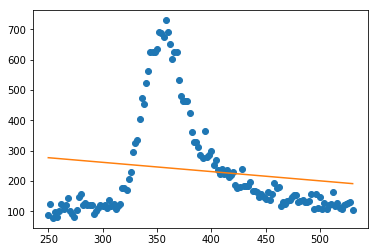

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import glob

calib_light = np.trapz(ca[:11], wa[:11])

def initial_counts(wavelength, counts):
    return np.trapz(wavelength[:11], counts[:11])

The code below will be used to analyze every single data set we've taken and collect the total counts in a list. The next step will be to isolate repeat trials and average them. Once that's been done successfully, bringing in additional data sets will be an easy matter. 

In [7]:
import glob

light_counts = []

for file in glob.iblog("/home/leonidus/WBLS_Data/10-31-17/*.arc_data"):
    light_counts.append(light_machine(file))
    

NameError: name 'glob' is not defined